# Project - Predict the likelihood of a liability customer buying personal loans

# Install the necessary libraries


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, ttest_1samp, wilcoxon, ttest_ind, chi2, zscore
import seaborn as sns
import matplotlib.cbook as cbook
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn import preprocessing
from scipy.stats import zscore

# import data Bank_Personal_Loan_Modelling-1.csv


In [2]:
###read the data in pandas FROM A CSV
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

#### Shape of the Data

In [3]:
df.shape

(5000, 14)

#### Data type of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#ID	Customer ID
#Age	Customer's age in completed years
#Experience	#years of professional experience
#Income	Annual income of the customer ($000)
#ZIPCode	Home Address ZIP code.
#Family	Family size of the customer
#CCAvg	Avg. spending on credit cards per month ($000)
#Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#Mortgage	Value of house mortgage if any. ($000)
#Personal Loan	Did this customer accept the personal loan offered in the last campaign?
#Securities Account	Does the customer have a securities account with the bank?
#CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
#Online	Does the customer use internet banking facilities?
#CreditCard	Does the customer use a credit card issued by UniversalBank?

###### Problem is to predict the probability of customer availing Loan, hence Personal Loan would be target variable (0 = No Loan) and (1 = Loan availed)

In [6]:
PredictColumn="Personal Loan"

#### Head and Tail of dataset

In [7]:
df.shape

(5000, 14)

In [8]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Checking the presence of missing values

In [10]:
if df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


#### 5  point summary

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
df.groupby(PredictColumn).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


###### Data set is not propotionate since only 480 have availed loan

In [13]:
df[df['Experience'] < 0]['Experience'].count()

52

In [14]:
#Converted all of these columns into their actual figures
df[['Income', 'CCAvg', 'Mortgage']] = df[['Income', 'CCAvg', 'Mortgage']] * 1000

In [15]:
#Dropping ID column as it is not required
df = df.drop(['ID'], axis = 1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,91107,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90089,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94720,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94112,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91330,4,1000.0,2,0,0,0,0,0,1


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


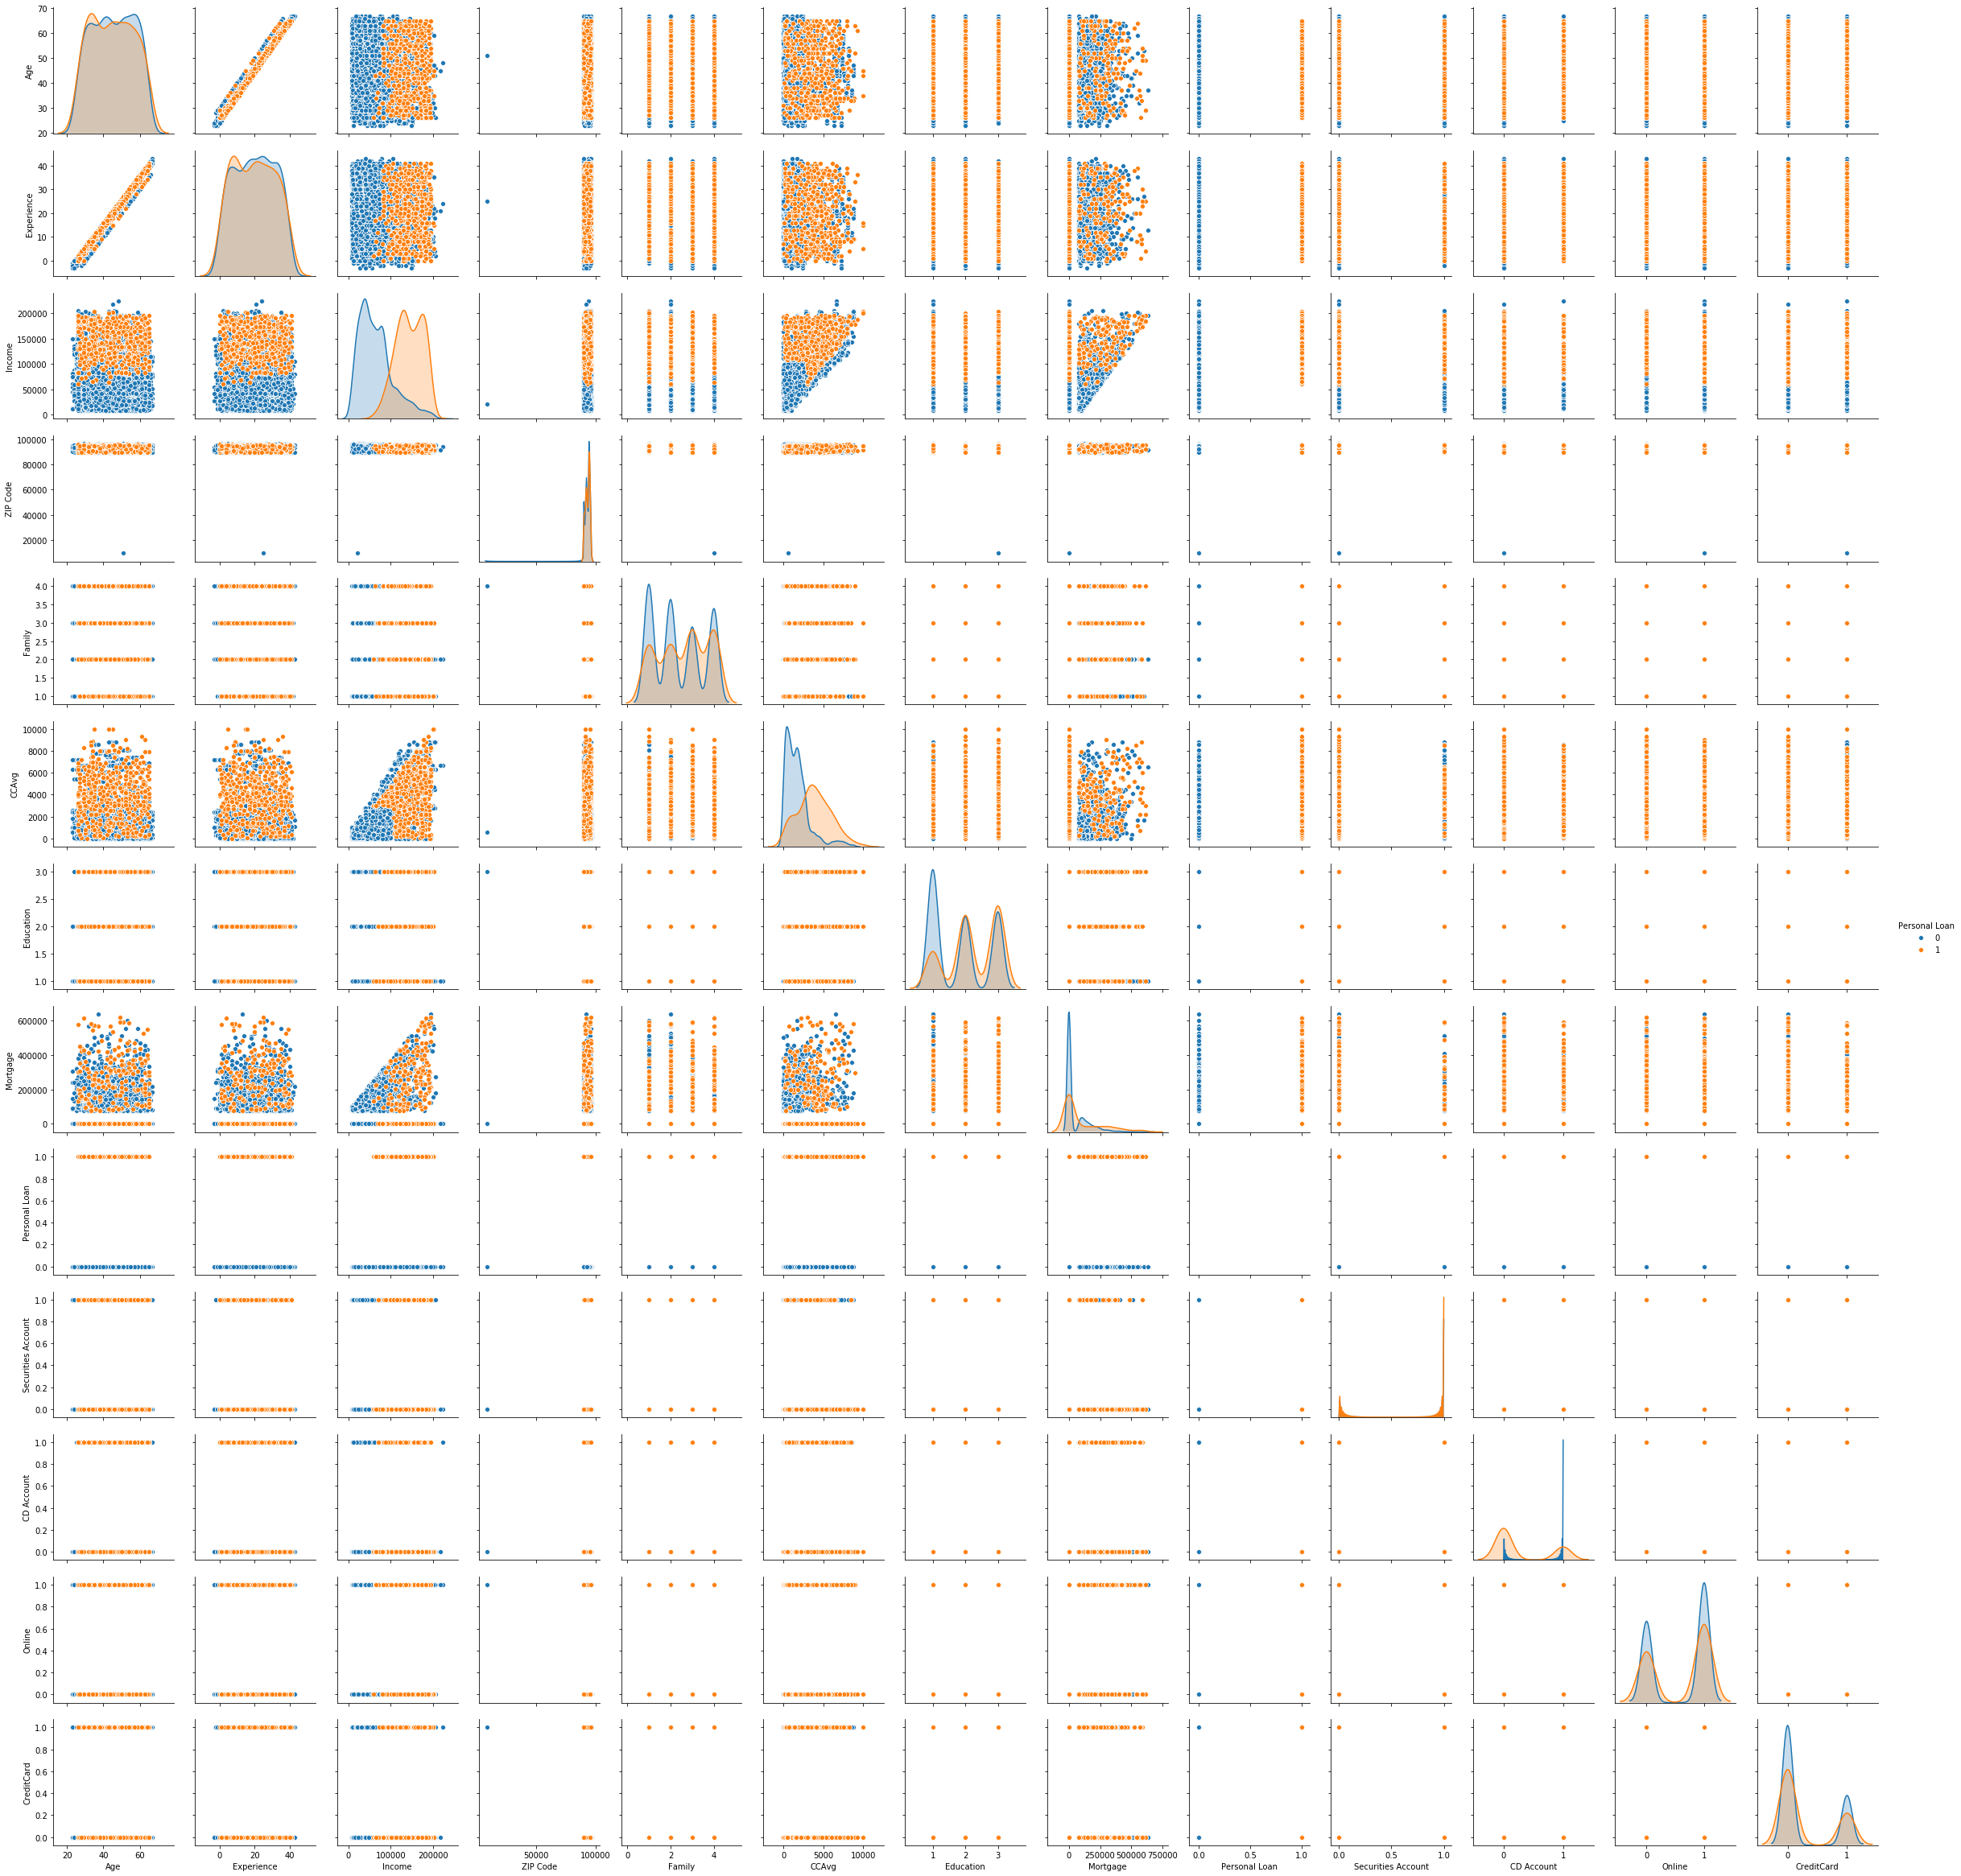

In [16]:
sns.pairplot(df,hue=PredictColumn)

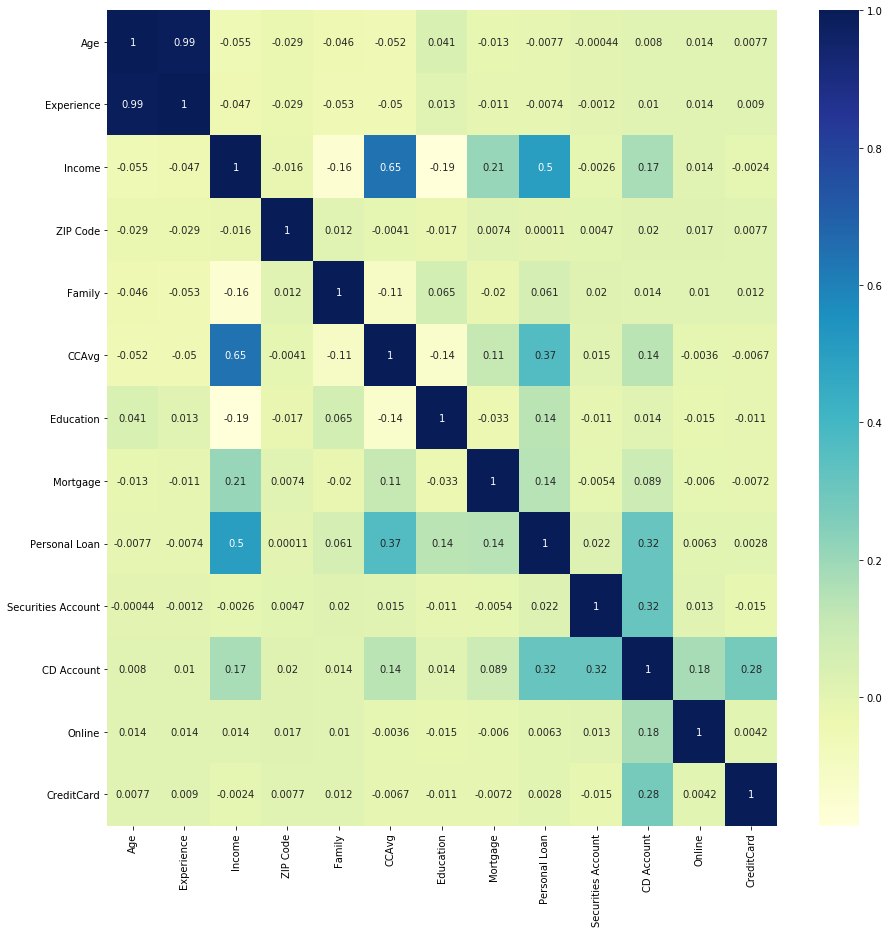

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )

##### Income and CCAvg, Personal Loan share a positive correlation

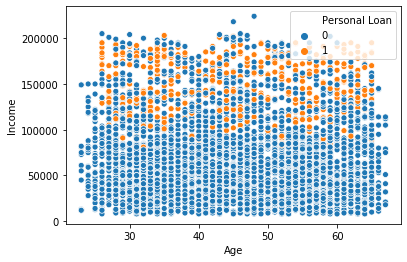

In [18]:
#Lets study the relation between Personal Loan, Income,CCAvg and CD Account as these share high correlation
sns.scatterplot(y = 'Income', x = 'Age', data = df, hue = 'Personal Loan')

##### People have availed personal loans irrespective of age

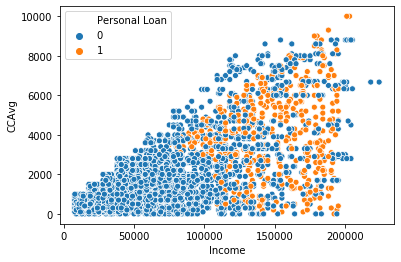

In [19]:
sns.scatterplot(x = 'Income', y = 'CCAvg', data = df, hue = 'Personal Loan')

##### Higher the Income and CCAvg, Higher is the probability of person availing Loan

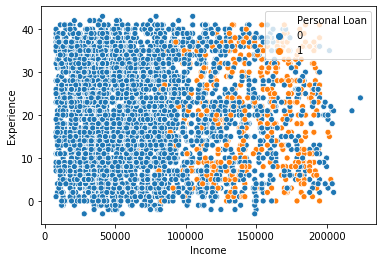

In [20]:
sns.scatterplot(x = 'Income', y = 'Experience', data = df, hue = 'Personal Loan')

##### Experience does not matter in comparison with people availing Loans

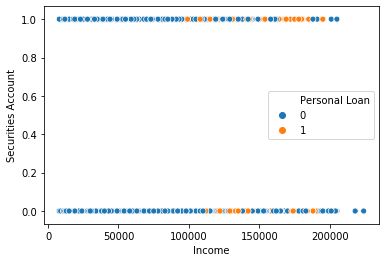

In [21]:
sns.scatterplot(x = 'Income', y = 'Securities Account', data = df, hue = 'Personal Loan')

##### People with Securities account have higher chances of availing personal loan 

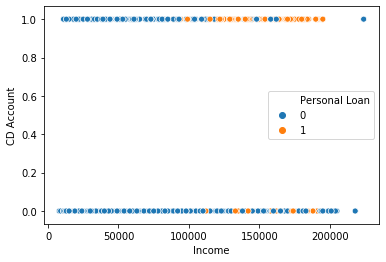

In [22]:
sns.scatterplot(x = 'Income', y = 'CD Account', data = df, hue = 'Personal Loan')

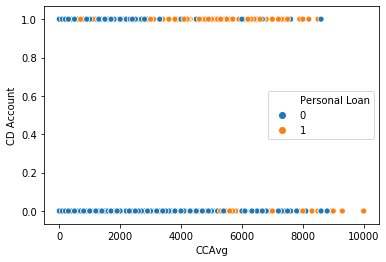

In [23]:
sns.scatterplot(x = 'CCAvg', y = 'CD Account', data = df, hue = 'Personal Loan')

##### Higher the Income and CCAvg, Higher is the probability of person having CD Account

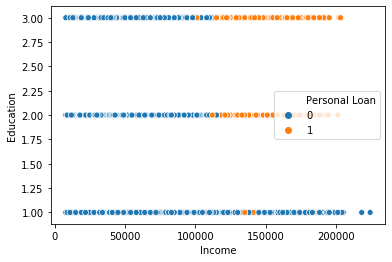

In [24]:
sns.scatterplot(y = 'Education', x = 'Income', data = df, hue = 'Personal Loan')

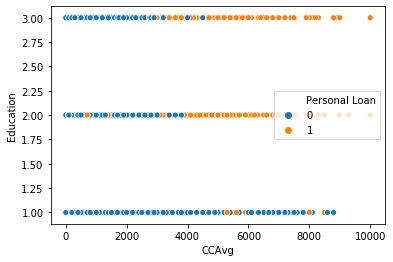

In [25]:
sns.scatterplot(y = 'Education', x = 'CCAvg', data = df, hue = 'Personal Loan')

##### People with 2+ years of education and high CCAvg & Income have higher chances of availing Loans

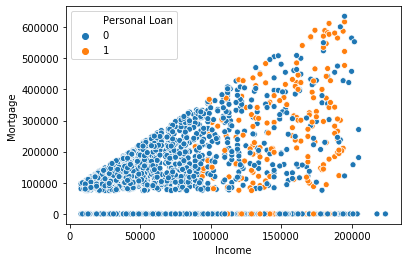

In [26]:
sns.scatterplot(y = 'Mortgage', x = 'Income', data = df, hue = 'Personal Loan')

##### There is some linear relation between Income and Mortgage value

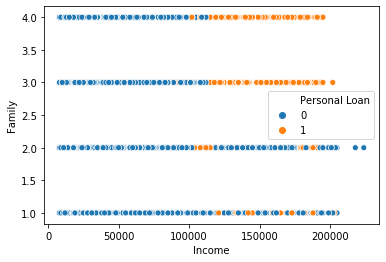

In [27]:
sns.scatterplot(y = 'Family', x = 'Income', data = df, hue = 'Personal Loan')

##### Family with more than 3 members have higher chances of availing loans

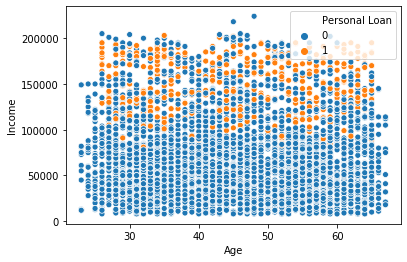

In [28]:
sns.scatterplot(x = 'Age', y = 'Income', data = df, hue = 'Personal Loan')

#### Members across all age groups with higher Income having higher CCAvg having a CD Account, Securities account and having a family of more than 3 members have higher probability of availing Loan.

In [29]:
#Find % of people who have availed for Loan
not_availed_Loan = len(df[df['Personal Loan'] == 0])
availed_Loan = len(df[df['Personal Loan'] == 1])

print("% of people who did not avail Loan {:.2f}%". format(not_availed_Loan/ (df['Personal Loan'].count()) * 100))

print("% of people availed Loan {:.2f}%". format(availed_Loan/ (df['Personal Loan'].count()) * 100))

% of people who did not avail Loan 90.40%
% of people availed Loan 9.60%


# Create the X(Feature-set) and Y(Target-set) sets for the Data.

In [30]:
X=pd.DataFrame()
for cols in df.columns:
    if cols!=PredictColumn:
        X[cols]=df[cols]
X.shape

(5000, 12)

In [31]:
Y = df[PredictColumn]
Y.shape

(5000,)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [33]:
## droping Age, experience, zipcode, online and credit card since there is no correlation from the above graphs
X = X.drop(['Age','Experience','ZIP Code','Online','CreditCard'], axis = 1)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
dtypes: float64(1), int64(6)
memory usage: 273.5 KB


In [35]:
accuracies = {}

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

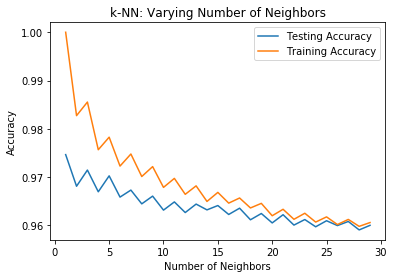

In [36]:
neighbors = np.arange(1, 30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
random_state=np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train.values.ravel())
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    random_state[i]=j
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
        
# creating odd list of K for KNN
myList = list(range(1,100))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaledX_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


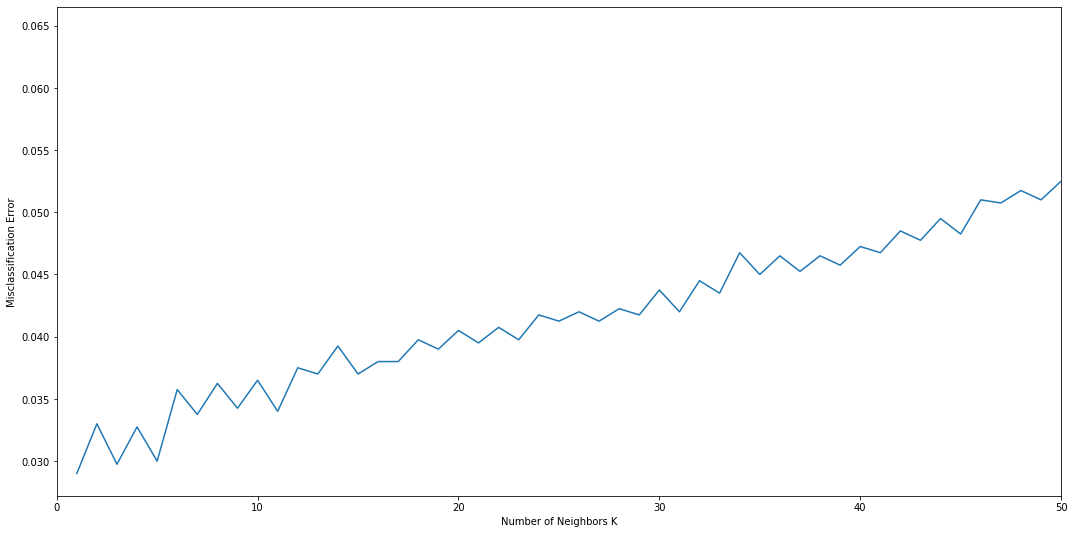

In [38]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Final model using optimum k value

In [81]:
#Although optimal value is 1, we took the value 3 since it gives optimal value with lowest misclassification error
test_size = 0.30 #taking 80:20 training and test set
seed = 8  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
#Compute accuracy on the training set
train_accuracy = knn.score(scaledX_train,y_train)
    
#Compute accuracy on the testing set
test_accuracy = knn.score(scaledX_test, y_test)

In [83]:
print("Performance score of train and test are =", train_accuracy, test_accuracy)
acc_knn = knn.score(scaledX_test, y_test) * 100
accuracies['KNN'] = acc_knn

Performance score of train and test are = 0.9848571428571429 0.9753333333333334


# Using Logistic regression

In [84]:
X_train_scaled_LR = preprocessing.scale(X_train)
X_test_scaled_LR = preprocessing.scale(X_test)

# Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

In [85]:
# Fit the model on 30%
LR = LogisticRegression()
LR.fit(X_train_scaled_LR, y_train.values.ravel())
y_predict = LR.predict(X_test_scaled_LR)
print("Classification Report")
print(classification_report(y_test, y_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))
print("Accuracy Score")
print(accuracy_score(y_test, y_predict))
print("F1 Score")
print(f1_score(y_test, y_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1367
           1       0.75      0.70      0.72       133

    accuracy                           0.95      1500
   macro avg       0.86      0.84      0.85      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix
[[1336   31]
 [  40   93]]
Accuracy Score
0.9526666666666667
F1 Score
0.7237354085603113


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
t=X_train.columns
coef_df = pd.DataFrame(LR.coef_, columns= t)
coef_df['intercept'] = LR.intercept_
print(coef_df)

     Income    Family     CCAvg  Education  Mortgage  Securities Account  \
0  2.330827  0.785667  0.259848   1.300441  0.062611           -0.282296   

   CD Account  intercept  
0    0.692816   -4.29707  


In [87]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1336   31]
 [  40   93]]


In [88]:
print('Train score: {}'.format(LR.score(X_train_scaled_LR, y_train) * 100))
print('Test score: {}'.format(LR.score(X_test_scaled_LR, y_test) * 100))

Train score: 94.37142857142857
Test score: 95.26666666666667


In [89]:
acc_logreg = LR.score(X_test_scaled_LR, y_test) * 100
accuracies['Logistic Regression'] = acc_logreg
print("Logistic Regression Accuracy: {}".format(acc_logreg))

Logistic Regression Accuracy: 95.26666666666667


#### Using Naive bayes classification

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaledX_train_NB = ss.fit_transform(X_train)
scaledX_test_NB = ss.transform(X_test)

In [91]:
NBC = GaussianNB(priors=None,var_smoothing=1e-09)
NBC.fit(scaledX_train_NB, y_train.values.ravel())
print(NBC)
# make predictions
expected = y_test
predicted = NBC.predict(scaledX_test_NB)
print('Total accuracy:', np.round(metrics.accuracy_score(expected, predicted),2))

GaussianNB(priors=None, var_smoothing=1e-09)
Total accuracy: 0.9


In [92]:
print("Classification Report")
print(classification_report(expected, predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1367
           1       0.44      0.62      0.52       133

    accuracy                           0.90      1500
   macro avg       0.70      0.77      0.73      1500
weighted avg       0.92      0.90      0.90      1500



In [93]:
print('Train score: {}'.format(NBC.score(scaledX_train_NB, y_train) * 100))
print('Test score: {}'.format(NBC.score(scaledX_test_NB, y_test) * 100))

Train score: 88.05714285714285
Test score: 89.73333333333333


In [94]:
print(metrics.confusion_matrix(expected, predicted))

[[1264  103]
 [  51   82]]


In [95]:
acc_nb = NBC.score(scaledX_test, y_test) * 100
accuracies['Naive Bayes'] = acc_nb
print("Naive Bayes Accuracy: {}".format(acc_nb))

Naive Bayes Accuracy: 89.73333333333333


# Compare

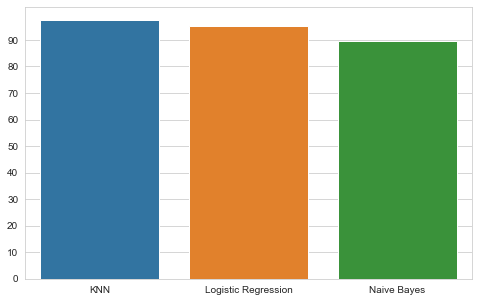

In [96]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

In [97]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes','K-Nearest Neighbors'],
    
    'Score': [acc_logreg, acc_nb, acc_knn]
    })

models.sort_values(by='Score', ascending=True)

,Model,Score
1,Naive Bayes,89.733333
0,Logistic Regression,95.266667
2,K-Nearest Neighbors,97.533333


## Confusion Matrix

In [98]:
y_cm_lr = LR.predict(X_test_scaled_LR)
y_cm_nb = NBC.predict(scaledX_test_NB)
y_cm_knn = knn.predict(scaledX_test)

In [99]:
cm_lr = confusion_matrix(y_test, y_cm_lr)
cm_knn = confusion_matrix(y_test, y_cm_knn)
cm_nb = confusion_matrix(y_test, y_cm_nb)

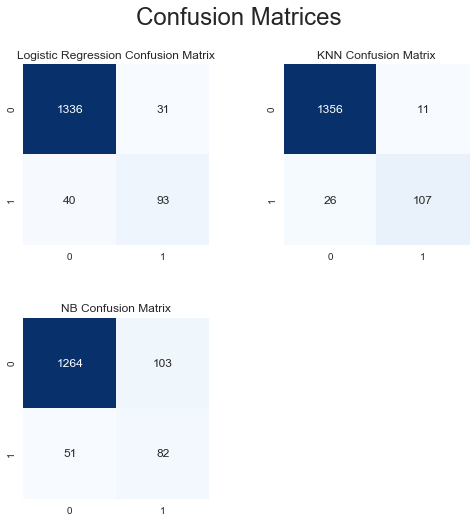

In [100]:
plt.figure(figsize = (8,8))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 12})

plt.subplot(2,2,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot = True, cmap = "Blues", fmt = 'd', cbar = False, annot_kws = {"size": 12})

plt.subplot(2,2,3)
plt.title("NB Confusion Matrix")
sns.heatmap(cm_nb, annot = True, cmap = "Blues", fmt = 'd', cbar = False, annot_kws = {"size": 12})


### Analyzing the KNN confusion matrix 

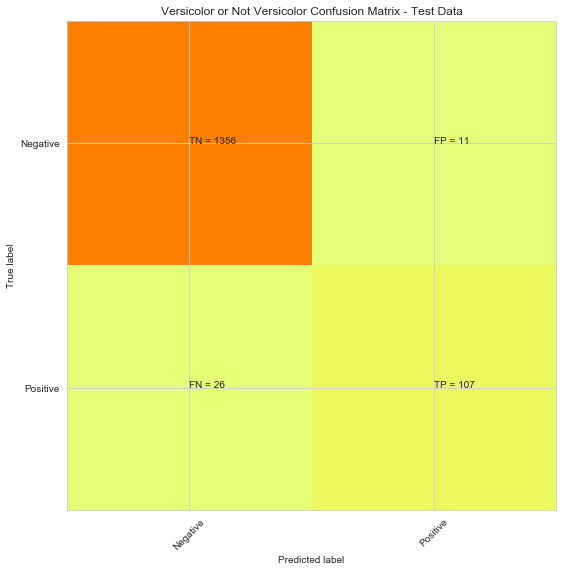

In [101]:
plt.clf()
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm_knn[i][j]))
plt.show()

##### Summary (values will change when rerun due to randomness of X and Y)
True Positives (TP): we correctly predicted that 107 will  take Loans

True Negatives (TN): we correctly predicted that 1356 will not  take loans

False Positives (FP): we incorrectly predicted that 11 will take loans when they actually did not take Loans (Type - 1 Error)

False Negatives (FN): we incorrectly predicted that 26 will not take Loans when they actually did take Loans (a "Type II error")

We can conclude KNN is the best suited algorithm as it  gives a good accuracy score of 94.73 on test data and confusion matrix gives a good prediction on no. of people availing the Loan.

Hence we would like to conclude that people having high Income & CCAvg, Family consisting of more than 3 members, having CD & Securities account have higher chances of availing Personal Loan